In [1]:
import numpy as np

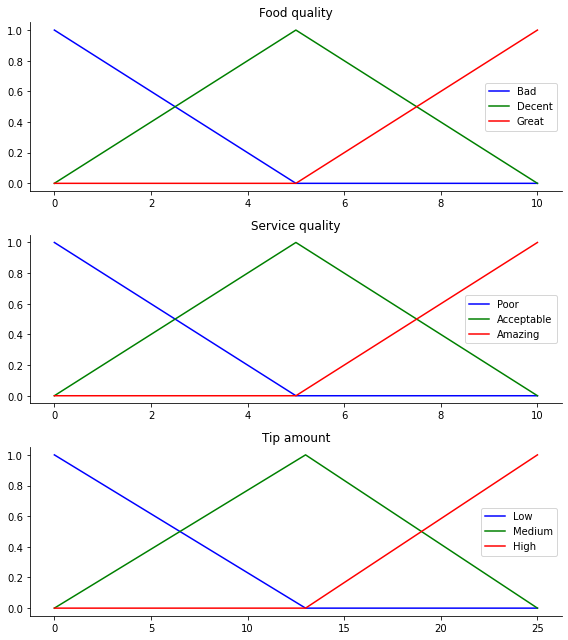

In [2]:
import numpy as np
import skfuzzy as fuzz
import matplotlib.pyplot as plt
x_qual = np.arange(0, 11, 1)
x_serv = np.arange(0, 11, 1)
x_tip  = np.arange(0, 26, 1)
qual_lo = fuzz.trimf(x_qual, [0, 0, 5])
qual_md = fuzz.trimf(x_qual, [0, 5, 10])
qual_hi = fuzz.trimf(x_qual, [5, 10, 10])
serv_lo = fuzz.trimf(x_serv, [0, 0, 5])
serv_md = fuzz.trimf(x_serv, [0, 5, 10])
serv_hi = fuzz.trimf(x_serv, [5, 10, 10])
tip_lo = fuzz.trimf(x_tip, [0, 0, 13])
tip_md = fuzz.trimf(x_tip, [0, 13, 25])
tip_hi = fuzz.trimf(x_tip, [13, 25, 25])
fig, (ax0, ax1, ax2) = plt.subplots(nrows=3, figsize=(8, 9))
ax0.plot(x_qual, qual_lo, 'b', linewidth=1.5, label='Bad')
ax0.plot(x_qual, qual_md, 'g', linewidth=1.5, label='Decent')
ax0.plot(x_qual, qual_hi, 'r', linewidth=1.5, label='Great')
ax0.set_title('Food quality')
ax0.legend()
ax1.plot(x_serv, serv_lo, 'b', linewidth=1.5, label='Poor')
ax1.plot(x_serv, serv_md, 'g', linewidth=1.5, label='Acceptable')
ax1.plot(x_serv, serv_hi, 'r', linewidth=1.5, label='Amazing')
ax1.set_title('Service quality')
ax1.legend()
ax2.plot(x_tip, tip_lo, 'b', linewidth=1.5, label='Low')
ax2.plot(x_tip, tip_md, 'g', linewidth=1.5, label='Medium')
ax2.plot(x_tip, tip_hi, 'r', linewidth=1.5, label='High')
ax2.set_title('Tip amount')
ax2.legend()
for ax in (ax0, ax1, ax2):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

Food quality was 6.5
Service was 9.8

[0.8] [0.2] [0.]
0.8 0.2 0.0
[0.8] [0.]


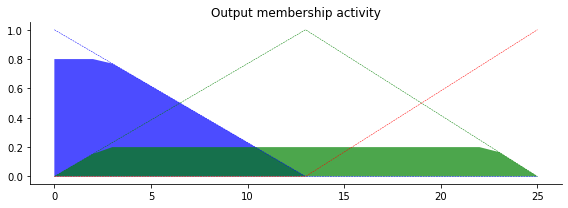

In [3]:
fo_qual=1,
serv_qual=1
qual_level_lo = fuzz.interp_membership(x_qual, qual_lo, fo_qual)
qual_level_md = fuzz.interp_membership(x_qual, qual_md, fo_qual)
qual_level_hi = fuzz.interp_membership(x_qual, qual_hi, fo_qual)
print(qual_level_lo,qual_level_md,qual_level_hi)
serv_level_lo = fuzz.interp_membership(x_serv, serv_lo, serv_qual)
serv_level_md = fuzz.interp_membership(x_serv, serv_md, serv_qual)
serv_level_hi = fuzz.interp_membership(x_serv, serv_hi, serv_qual)
print(serv_level_lo,serv_level_md,serv_level_hi)
active_rule1 = np.fmax(qual_level_lo, serv_level_lo)
tip_activation_lo = np.fmin(active_rule1, tip_lo)  
tip_activation_md = np.fmin(serv_level_md, tip_md)
active_rule3 = np.fmax(qual_level_hi, serv_level_hi)
tip_activation_hi = np.fmin(active_rule3, tip_hi)
tip0 = np.zeros_like(x_tip)
print(active_rule1,active_rule3)
fig, ax0 = plt.subplots(figsize=(8, 3))
ax0.fill_between(x_tip, tip0, tip_activation_lo, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, tip_activation_md, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, tip_activation_hi, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')
for ax in (ax0,):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left()

plt.tight_layout()

#mycode 

In [4]:
ip1=np.array([qual_level_lo,qual_level_md,qual_level_hi])
ip2=np.array([serv_level_lo,serv_level_md,serv_level_hi])


In [5]:
implicationrules=np.array([[1,1,1],[1,1,1],[1,1,1]])#0=>or,1=>and
rulebase=np.array([[0,0,0],[0,1,1],[1,2,2]])#qual[L,M,H] vs serv[L,M,H]=>1,2,3
equivalance_array=np.array([tip_lo,tip_md,tip_hi])
finalarray=np.zeros_like(equivalance_array)


In [8]:
ctr=0
ruleval=np.zeros([int(np.size(ip1)),int(np.size(ip2))])
print(ruleval)
def implicationop(imprule,ruleval,op_memfn):
    if imprule==1 :
        return np.fmin(ruleval, op_memfn)
    if imprule==0 :
        return np.fmax(ruleval, op_memfn)

for i in range(0,np.size(ip1)):
    for j in range (0,np.size(ip2)):
        ruleval[i,j]=np.fmin(ip1[i],ip1[j])
        if (ruleval[i,j]>0):
            equ_val=rulebase[i,j]
            op_memfn=equivalance_array[equ_val]
            currentfn=implicationop(implicationrules[i,j],ruleval[i,j],op_memfn)
            finalarray[equ_val]=np.fmax(currentfn,finalarray[equ_val])
    ctr+=1
ruleval 

[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


array([[0.8, 0.2, 0. ],
       [0.2, 0.2, 0. ],
       [0. , 0. , 0. ]])

Text(0.5, 1.0, 'Output membership activity')

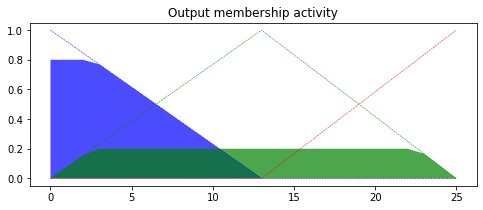

In [9]:
fig, ax0 = plt.subplots(figsize=(8, 3))
tip0 = np.zeros_like(x_tip)
ax0.fill_between(x_tip, tip0, finalarray[0], facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, finalarray[1], facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, finalarray[2], facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

Text(0.5, 1.0, 'Output membership activity')

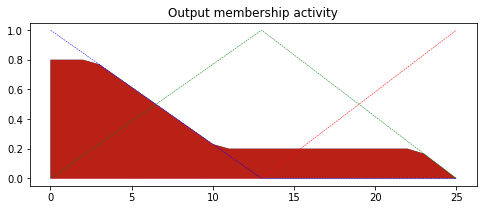

In [10]:
unionarr=np.max(finalarray,0)
fig, ax0 = plt.subplots(figsize=(8, 3))
tip0 = np.zeros_like(x_tip)
ax0.fill_between(x_tip, tip0, unionarr, facecolor='b', alpha=0.7)
ax0.plot(x_tip, tip_lo, 'b', linewidth=0.5, linestyle='--', )
ax0.fill_between(x_tip, tip0, unionarr, facecolor='g', alpha=0.7)
ax0.plot(x_tip, tip_md, 'g', linewidth=0.5, linestyle='--')
ax0.fill_between(x_tip, tip0, unionarr, facecolor='r', alpha=0.7)
ax0.plot(x_tip, tip_hi, 'r', linewidth=0.5, linestyle='--')
ax0.set_title('Output membership activity')

In [11]:
labels = ['centroid', 'bisector', 'mean of maximum', 'min of maximum',
          'max of maximum']
xvals = [defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom]
colors = ['r', 'b', 'g', 'c', 'm']
ymax = [fuzz.interp_membership(x_tip, unionarr, i) for i in xvals]
plt.figure(figsize=(8, 5))
plt.plot(x_tip, unionarr, 'k')
for xv, y, label, color in zip(xvals, ymax, labels, colors):
    plt.vlines(xv, 0, y, label=label, color=color)
plt.ylabel('Fuzzy membership')
plt.xlabel('Universe variable (arb)')
plt.ylim(-0.1, 1.1)
plt.legend(loc=2)
plt.show()
print(defuzz_centroid,
         defuzz_bisector,
         defuzz_mom,
         defuzz_som,
         defuzz_lom)

NameError: name 'defuzz_centroid' is not defined